# Generating the code for the Neural Network Estimation

## Libraries importieren

In [7]:
# Import the necessary libraries
import pandas as pd

## Daten einladen

In [8]:
# import the pickle files from the github repository

training_features_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/training_features.pkl"
validation_features_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/validation_features.pkl"
training_labels_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/training_labels.pkl"
validation_labels_path = "https://raw.githubusercontent.com/FabsenMc/bakery_prediction/main/3_Model/Neuronales_Netz/pickle_data/validation_labels.pkl"

# Read the pickle files

training_features = pd.read_pickle(training_features_path)
validation_features = pd.read_pickle(validation_features_path)
training_labels = pd.read_pickle(training_labels_path)
validation_labels = pd.read_pickle(validation_labels_path)

# Verify the loaded data by printing their shapes and a few rows
print("Loaded Training features dimensions:", training_features.shape)
print("Loaded Validation features dimensions:", validation_features.shape)
print()
print("Loaded Training labels dimensions:", training_labels.shape)
print("Loaded Validation labels dimensions:", validation_labels.shape)
print()

print("First few rows of loaded training features:")
print(training_features.head())
print()
print("First few rows of loaded training labels:")
print(training_labels.head())

Loaded Training features dimensions: (1462, 10)
Loaded Validation features dimensions: (357, 10)

Loaded Training labels dimensions: (1462, 6)
Loaded Validation labels dimensions: (357, 6)

First few rows of loaded training features:
   0  1  2  3  4  5  6  7  8  9
0  0  1  0  0  0  0  0  0  0  1
1  0  1  0  0  0  0  0  0  1  0
2  0  1  0  0  0  0  0  0  0  1
3  0  1  0  0  0  1  0  0  0  0
4  0  1  0  0  0  0  0  1  0  0

First few rows of loaded training labels:
            0           1           2          3           4    5
0  148.828353  535.856285  201.198426  65.890169  317.475875  0.0
1  159.793757  546.780787  265.261254  74.543917  383.628682  0.0
2  111.885594  427.343259  210.260241  69.262728  305.523072  0.0
3  168.864941  454.859641  190.686641  61.490175  308.408168  0.0
4  171.280754  492.818804  181.644870  86.759861  355.518770  0.0


## Converting loaded dataframes to numpy arrays for further calculations

In [10]:
# Convert DataFrames to numpy arrays
training_features_array = training_features.to_numpy()
training_labels_array = training_labels.to_numpy().flatten()  # Flatten in case labels are a DataFrame with one column

# gibt die ersten 5 Zeilen aus -> sind ja jetzt dummy codiert
print("Training Features Array:")
print(training_features_array[:5])

Training Features Array:
[[0 1 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0 1 0]
 [0 1 0 0 0 0 0 0 0 1]
 [0 1 0 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 1 0 0]]


## Defining Neural Network
Using Sequential model definition from Keras with batch normalization and dense layers

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [5]:
# defining model, input shape nimmt aus shape die Zweite Zahl (Zahl der Spalten)
model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:25: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 10)             │            40 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            44 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 199 (796.00 B)

 Trainable params: 179 (716.00 B)

 Non-trainable params: 20 (80.00 B)

## Compiling and training model

In [6]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=100, batch_size=32,
                    validation_data=(validation_features, validation_labels))

Epoch 1/100


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 56341.0352 - val_loss: 47392.9297
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 54966.4492 - val_loss: 46945.1914
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 53549.6289 - val_loss: 46133.2539
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 55604.2891 - val_loss: 44656.3242
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 51007.0156 - val_loss: 42097.8633
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 52773.9219 - val_loss: 38045.7617
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 47101.7734 - val_loss: 32496.4004
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 40807.2148 - val_loss: 26792.8066
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35363.9180 - val_loss: 23111.7402
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 30748.2578 - val_loss: 22157.4141
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29907.0977 - val_loss

## Savin model for furture use

In [ ]:
model.save("python_model.h5")

## Plotting training history

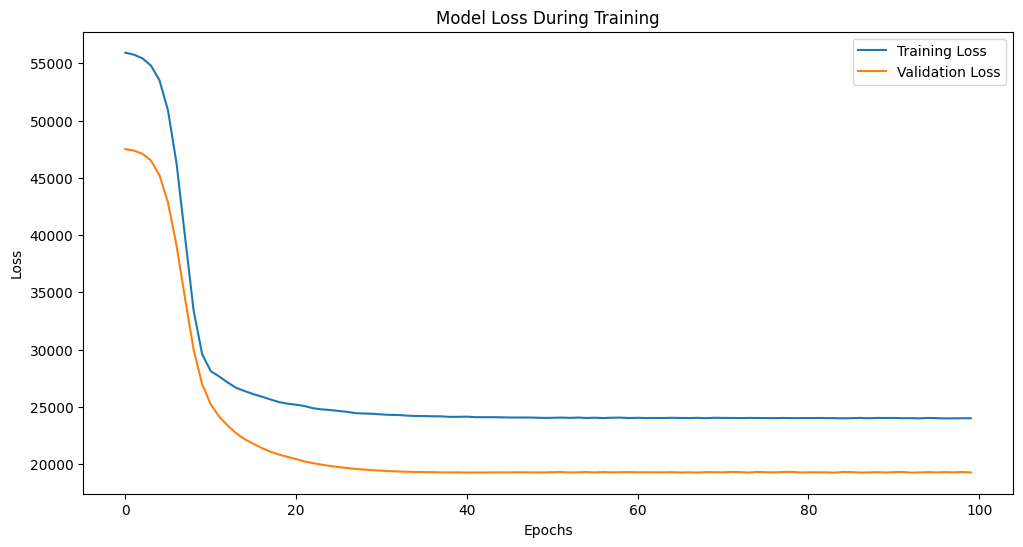

In [20]:
import matplotlib.pyplot as plt

# hier kann es hilfreich sein die visualisierung zu beschneiden, um den Verlauf besser zu sehen
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Predictions and evaluations of the model

In [21]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred) # hier werden die Werte in Numpy Arrays überführt für die folgenden Berechnungen
    non_zero_mask = y_true != 0 # es wird eine Maske erstellt, die alle Werte ungleich 0 markiert um eine Division durch 0 zu verhindern
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%") # .2f heißt Gleitkommazahl mit zwei Dezimalstellen
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step


IndexError: boolean index did not match indexed array along dimension 1; dimension is 1 but corresponding boolean dimension is 6

In [30]:
# Chatgpt Code
# Normalize the data (optional, but recommended)
from sklearn.preprocessing import StandardScaler

scaler_feat = StandardScaler()
scaler_label = StandardScaler()

training_features = scaler_feat.fit_transform(training_features)
validation_features = scaler_feat.transform(validation_features)

training_labels = scaler_label.fit_transform(training_labels)
validation_labels = scaler_label.transform(validation_labels)

# Build the neural network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# defining model, input shape nimmt aus shape die Zweite Zahl (Zahl der Spalten)
model_CGPT = Sequential([
  Dense(64, input_dim=training_features.shape[1], activation='relu'),
    Dense(64, activation='relu'),
  Dense(training_labels.shape[1], activation='linear')
])

model_CGPT.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Train the model
history = model_CGPT.fit(training_features, training_labels, epochs=100, batch_size=32, validation_data=(validation_features, validation_labels))

# Evaluate the model
loss = model_CGPT.evaluate(validation_features, validation_labels)
print(f'Validation Loss: {loss}')

# Predicting the sales volumes for the validation set
predictions = model_CGPT.predict(validation_features)

# Inverse transform the predictions and actual values to get the original scale
validation_labels_inverse = scaler_label.inverse_transform(validation_labels)
predictions_inverse = scaler_label.inverse_transform(predictions)

# Display the first few predictions and actual values
print("First few predictions:\n", predictions_inverse[:5])
print("First few actual values:\n", validation_labels_inverse[:5])


Epoch 1/100


/home/codespace/.python/current/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


46/46 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1.0590 - val_loss: 47634.7500
Epoch 2/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9153 - val_loss: 47633.6992
Epoch 3/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9680 - val_loss: 47637.6875
Epoch 4/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9324 - val_loss: 47629.5234
Epoch 5/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9801 - val_loss: 47635.4609
Epoch 6/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0767 - val_loss: 47640.0742
Epoch 7/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8994 - val_loss: 47632.7188
Epoch 8/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9075 - val_loss: 47630.8477
Epoch 9/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0341 - val_loss: 47642.7344
Epoch 10/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9072 - val_loss: 47628.8516
Epoch 11/100
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9167 - val_loss: 47631.1758
Epoch 12/100
46/46 ━━━━━━━━━━━━